# Homework 1

In this assignment, we will be exploring the car dataset and analyzing their fuel efficiency. <br >
Specifically, we will do some exploratory analysis with visualizations, then we will build a model for Simple Linear Regression, a model for Polynomial Regression, and one model for Logistic Regression. <br >
**The given dataset is already modified and cleaned**, but you can find [the original information here.](https://archive.ics.uci.edu/ml/datasets/auto+mpg).

## Dataset Attribute Information

1. **mpg**: Miles per gallon. This is one primary measurement for car fuel efficiency.
2. **displacement** : The cylinder volumes in cubic inches.
3. **horsepower** : Engine power.
4. **weight** : In pounds.
5. **acceleration** : The elapsed time in seconds to go from 0 to 60mph.
6. **origin** : Region of origin.

### Libraries that can be used: numpy, pandas, scikit-learn, seaborn, plotly, matplotlib
Any libraries used in the discussion materials are also allowed.

#### Other Notes
 - Don't worry about not being able to achieve high accuracy, it is neither the goal nor the grading standard of **this** assignment. <br >
 - If not specified, you are not required to do hyperparameter tuning, but feel free to do so if you'd like.
 - Discussion materials should be helpful for doing the assignments.

# Exercises
## Exercise 1 - Exploratory Analysis (20 points in total)

### Exercise 1.1 - Correlation Matrix (10 points)
Generate a Pearson [correlation matrix plot](https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07) in the form of a heatmap. See the link to have an idea about what this visualization should look like. <br >
After generating the plot, answer the following question: <br >
**If we are going to predict ``mpg`` in Simple Linear Regression(i.e., $y=ax+b$), which attribute are you most UNLIKELY to pick as the independent variable? Explain why.**

Requirements & notes
 - When computing correlation, make sure to drop the column ``origin`` to avoid errors.
 - The computed correlation values should be shown on the plot.
 - Use a diverging color scale with the color range being \[-1, 1\] and center being 0 (if applicable).

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from random import random


df = pd.read_csv('auto-mpg.csv')
df = df.drop('origin', axis=1) #axis 0 for rows and 1 for columns

<AxesSubplot:>

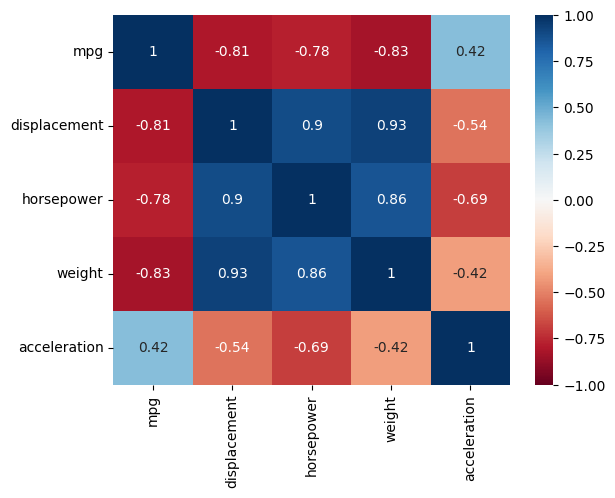

In [27]:
correlationMap = df.corr()
sns.heatmap(correlationMap, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

##### I would not choose Acceleration as its correlation value is closest to 0 ie. 0.42 which implies that there is least degree of correlation. Closer it is to +1 or -1 more positively and negatively correlated it is respectively.

### Exercise 1.2 - Pairplot (10 points)
Generate a pairplot(a.k.a. scatter plot matrix) of the given dataset. <br >
After generating the plot, answer the following question: <br >
**If we are using ``horsepower`` to predict ``mpg``, which method could lead to the best performance? (Linear Regression, Polynomial Regression, or Logistic Regression) Explain why.**

Note that there is no requirement on the diagonals. You can leave empty or use other representations based on your preference. However, having ``origin``-based grouped data distributions on the diagonals effectively helps you answer some questions in the later exercises.   

Requirements
 - The points should be colored based on the column ``origin``.

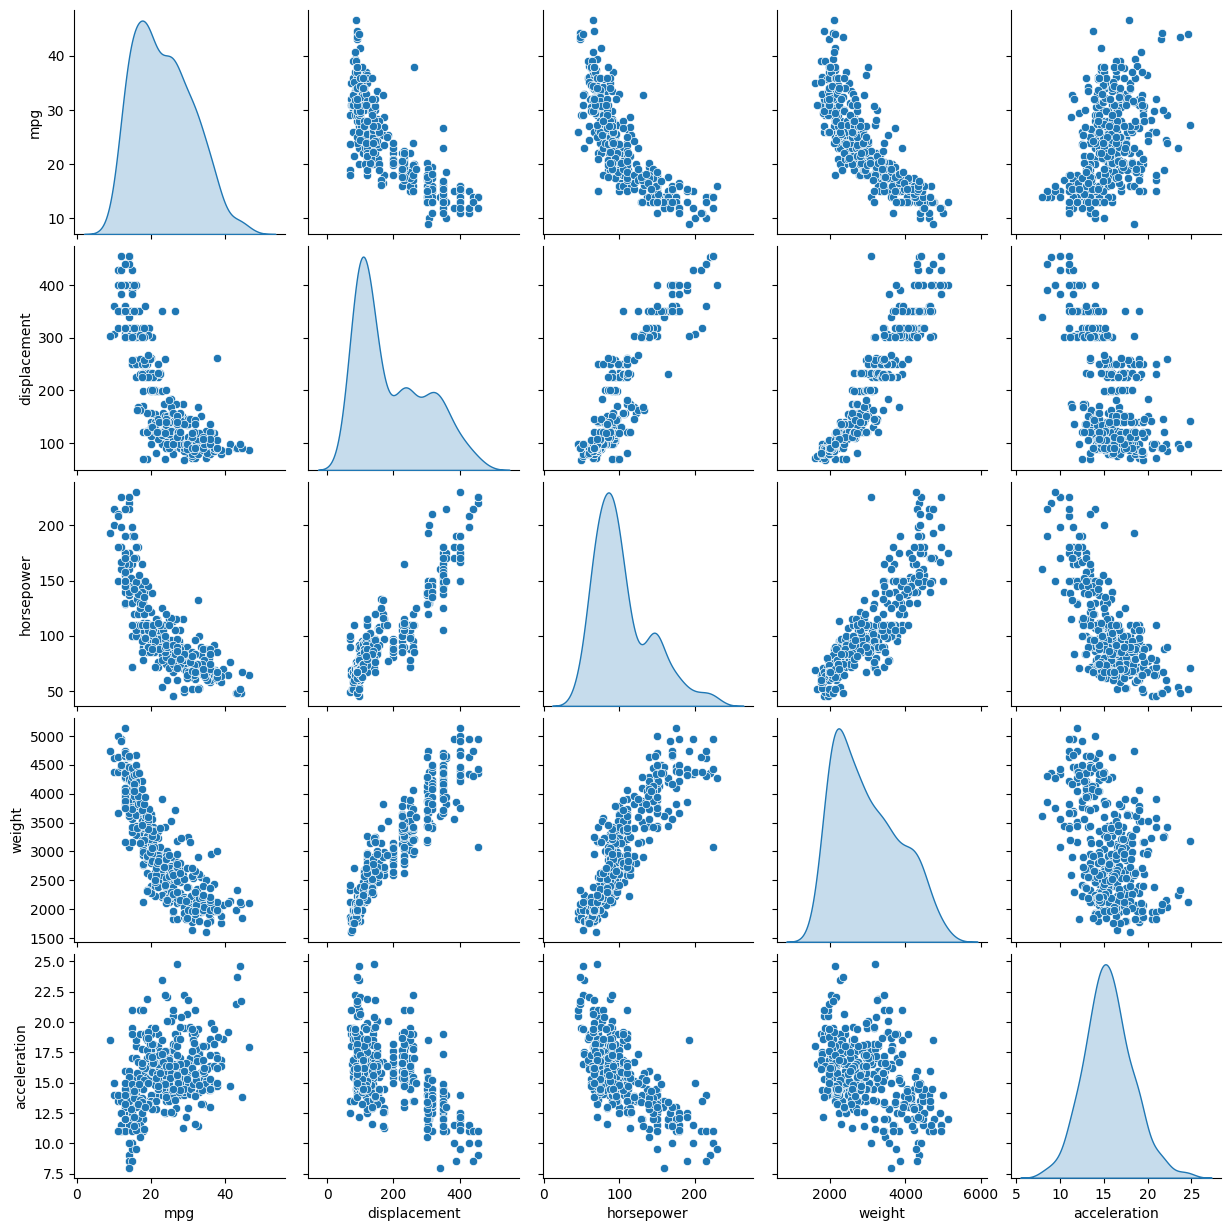

In [28]:
sns.pairplot(df, diag_kind='kde')

#### I would choose a polynomial regression curve as a linear line cannot be made that would visually go through the center of the area covered by most points. 

## Exercise 2 - Linear and Polynomial Regression (40 points in total)

### Exercise 2.1 - Splitting Dataset (5 points)
Split the data into training and testing set with the ratio of 80:20.

In [3]:
training, test = train_test_split(df, test_size=0.2, random_state=2022)


### Exercise 2.2 - Simple Linear Regression (10 points)
Using one of the other attributes(excluding ``origin``) by your choice, please build a simple linear regression model that predicts ``mpg``. <br >

Requirements
 - Report the testing MSE error.

In [5]:
model = LinearRegression()
y_train = training['mpg']
y_test = test['mpg']
y_test = y_test[:, np.newaxis]
print(type(y_test))
nos = df.columns
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

<class 'numpy.ndarray'>


/var/folders/qx/wkmf7bz93zj0jjnc541grk780000gn/T/ipykernel_2467/1743030981.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_test = y_test[:, np.newaxis]


## Trying out different variables to see which one is the best

For mpg Testing RMSE: 1.500633124514097e-28 and Testing R2: 1.0


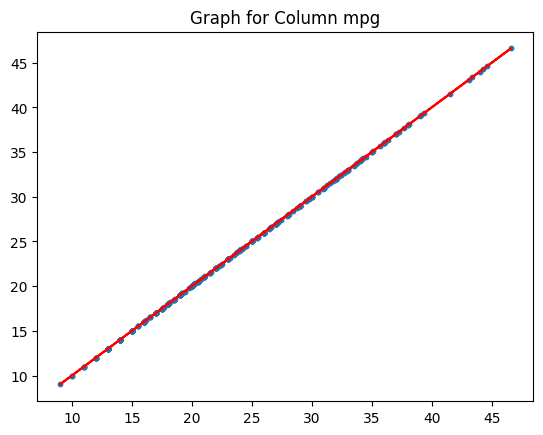

For displacement Testing RMSE: 18.599111179994257 and Testing R2: 0.6828996945555266


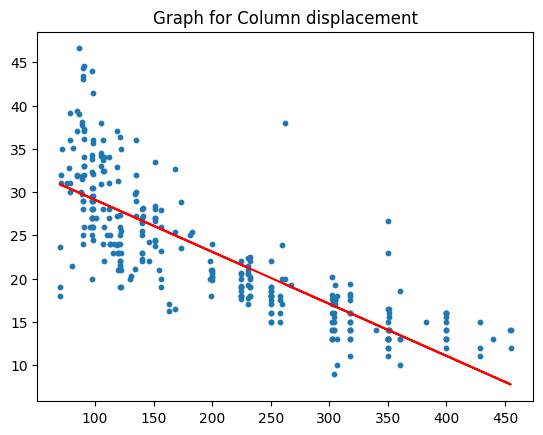

For horsepower Testing RMSE: 24.26422578689446 and Testing R2: 0.5863139193084668


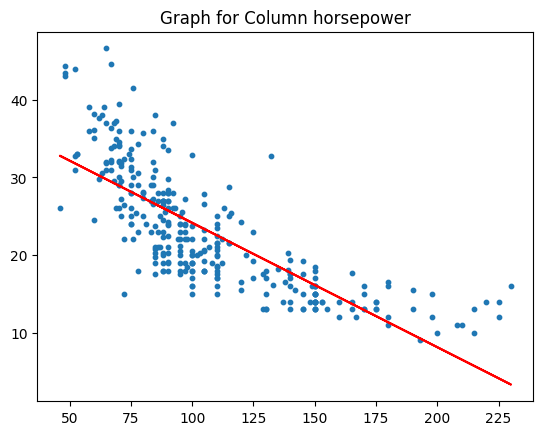

For weight Testing RMSE: 19.067739371981595 and Testing R2: 0.6749099502402758


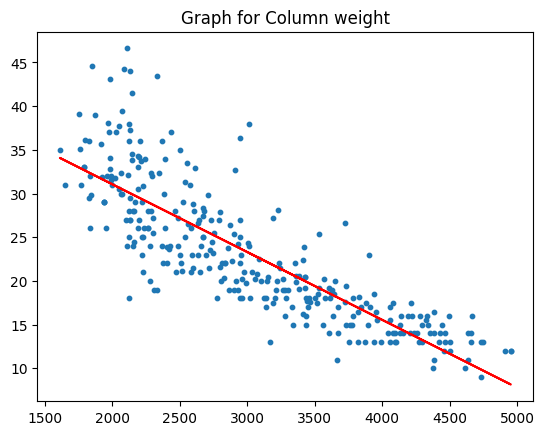

For acceleration Testing RMSE: 49.42126202767051 and Testing R2: 0.15740611834815055


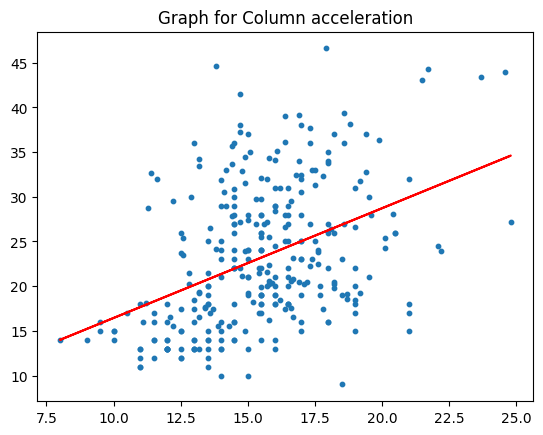

In [31]:
for col in nos:
    x_train = training[col]
    x_test = test[col]
    x_train = np.array(x_train)
    x_train = x_train.reshape(-1,1)
    x_test = np.array(x_test)
    x_test = x_test.reshape(-1,1)
    # print(x_train.shape, x_test.shape, y_train.shape)
    model.fit(x_train, y_train)
    yhat_train_pred = model.predict(x_train)
    yhat_test_pred = model.predict(x_test)
    mse = mean_squared_error(y_train,yhat_train_pred)
    mse_test = mean_squared_error(y_test,yhat_test_pred)
    r2 = r2_score(y_train,yhat_train_pred)
    r2_test = r2_score(y_test,yhat_test_pred)
    #print('For {} Training RMSE: {} and Training R2: {}'.format(col,mse,r2))
    print('For {} Testing RMSE: {} and Testing R2: {}'.format(col,mse_test,r2_test))
    plt.title("Graph for Column {}".format(col))

    plt.scatter(x_train,y_train,s=10)
    plt.plot(x_train, yhat_train_pred, color='r')
    plt.show()

Ans = 'Weight would be the ideal factor to check for mpg prediction compared to the others as the RMSE is the lowest and R2 is the highest compared to the rest.'

### I chose weight as the ideal factor

For testing RMSE for the chosen factor Weight is : 18.83644256912799 and Testing R2: 0.6788533799086839


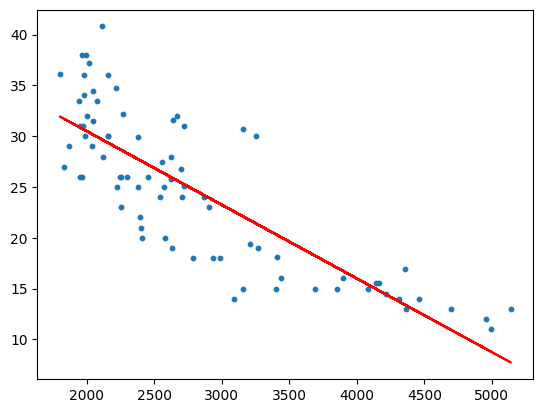

In [32]:
x_test = test['weight']
x_test = np.array(x_test)
x_test = x_test.reshape(-1,1)
model.fit(x_test, y_test)
yhat_test_pred = model.predict(x_test)
mse_test = mean_squared_error(y_test,yhat_test_pred)
r2_test = r2_score(y_test,yhat_test_pred)
print('For testing RMSE for the chosen factor Weight is : {} and Testing R2: {}'.format(mse_test,r2_test))
plt.scatter(x_test,y_test,s=10)
plt.plot(x_test, yhat_test_pred, color='r')
plt.show()


#### For testing RMSE for the chosen factor Weight is : 17.948903501463327 and Testing R2: 0.6768362415246509

### Exercise 2.3 - Polynomial Regression (25 points)
Build polynomial regression models that predict ``mpg`` with the same choice in 2.2. <br >
Specifically, from degree=2 to degree=4, build one respectively. <br >
Then, based on the reported errors from only these three degrees, **do you think there is a sign of overfitting? Provide your reasoning.**


Requirements
 - Report the training MSE error for each of the three degrees.
 - Report the testing MSE error for each of the three degrees.


In [33]:
df = pd.read_csv('auto-mpg.csv')
df = df.drop('origin', axis=1) #axis 0 for rows and 1 for columns

training, test = train_test_split(df, test_size=0.2, random_state=2022)

In [34]:
def polyfunction(degree):
    polynomial_features= PolynomialFeatures(degree=2)
    # x_train = np.array(training['weight'])
    # x_train = x_train[:, np.newaxis]
    x = np.array(df['weight'])
    x = x[:,np.newaxis]
    y = np.array(df['mpg'])
    y = y[:,np.newaxis]

    x_poly = polynomial_features.fit_transform(x) 
    #print(x_poly[0])
    # x^0, x1, x1^2 hence shape = 3
    # All variations of the polynomials of degree 2 are present. We use fit_transform to fit our x_train into this poly and get the respective numbers
    # The x_poly will have x0, x,x2 and fitting and transforming will make it wrt to x_train
    x_poly_train, x_poly_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=2022)

    # y_train = y_train[:, np.newaxis]
    x_poly_train = np.array(x_poly_train)
    x_poly_test = np.array(x_poly_test)
    #x_poly_train = x_poly_train[:, np.newaxis]

    #nsamples, nx, ny = x_poly_train.shape
    #x_poly_train = x_poly_train.reshape((nsamples,nx*ny))
    #print(x_poly_train.shape, y_train.shape)
    #y_test = test['mpg']
    #y_test = y_test[:, np.newaxis]

    model = LinearRegression()
    model.fit(x_poly_train, y_train)
    yhat_train_pred = model.predict(x_poly_train)
    # We don't recalculate model.fit as we only need to test it on the testing
    #yhat_test_pred = model.predict(x_poly_test) DONE LATER

    rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
    print("For Degree : {}".format(degree))
    print('Training RMSE: %8.15f' % rmse)
    

    yhat_test_pred =  model.predict(x_poly_test)

    rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
    
    print('Testing RMSE: %8.15f' % rmse)
    

    plt.scatter(df['weight'], df['mpg'], s=10)
    # sort the values of x before line plot
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(training['weight'],yhat_train_pred), key=sort_axis)
    x_poly_train, yhat_train_pred = zip(*sorted_zip)
    plt.title("Graph for Degree {}".format(degree))
    plt.plot(x_poly_train, yhat_train_pred, color='m')
    plt.show()
    


For Degree : 2
Training RMSE: 4.168928031643576
Testing RMSE: 4.134278329649043


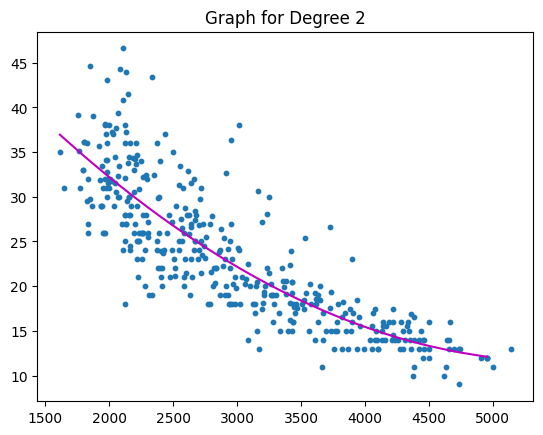

For Degree : 3
Training RMSE: 4.168928031643576
Testing RMSE: 4.134278329649043


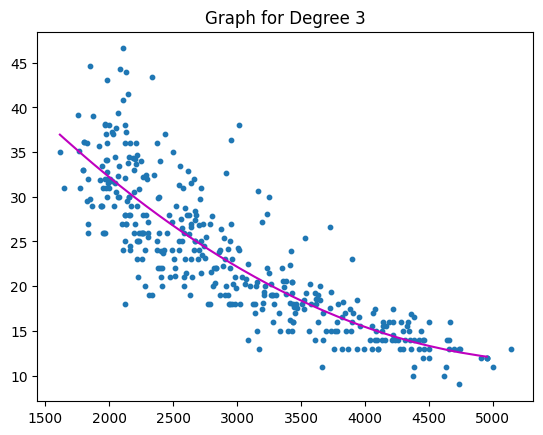

For Degree : 4
Training RMSE: 4.168928031643576
Testing RMSE: 4.134278329649043


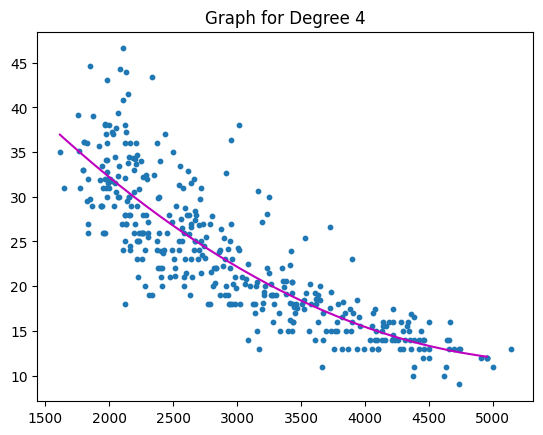

In [35]:
polyfunction(2)
polyfunction(3)
polyfunction(4)

## Exercise 3 - Logistic Regression (40 points in total)

Now we are going to build a classification model on ``origin`` using all the other 5 attributes. <br >
Note that Logistic Regression is a binary classificaiton algorithm.

### Exercise 3.1 - Processing and Splitting the Dataset (5 points)
In this exercise 3, we only consider those observations where they originate from either "USA" or "Japan". <br >
So please **remove** those observations that originate from "Europe". <br >
And then, split the data into training and testing set with the ratio of 80:20. <br >


In [36]:
df = pd.read_csv('auto-mpg.csv')

df = df.drop(df[df['origin'] == "Europe"].index)

# Checking if europe exists (newdf["origin"] == "Europe").any()

training, testing = train_test_split(df, test_size=0.2, random_state= 22)

y_train = training['origin']
y_test = testing['origin']
x_train = training.drop(columns="origin")
x_test = testing.drop(columns="origin")
#print(y_train.shape,y_test.shape,x_train.columns,x_test.columns)

### Exercise 3.2 - Logistic Regression (20 points)

Using all the other 5 attributes, please build a Logistic Regression model that distinguishes between cars from Japan and cars from the USA. <br >
Then, **if we are distinguishing between Japan and Europe this time, how do you think the model performance(in terms of accuracy) will change? Provide your reasoning.**

Requirements
 - Report the testing precision and recall for both regions.

In [37]:
scaler = preprocessing.StandardScaler() #Bringing all values between 0 and 1
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
y_train = pd.get_dummies(y_train, columns = ['origin'])
logreg.fit(x_train,y_train["Japan"])
y_test = pd.get_dummies(y_test, columns = ['origin'])
yhat_test = logreg.predict(x_test)
logreg.score(x_test,y_test['Japan'])

0.8769230769230769

In [40]:
from sklearn.metrics import classification_report
#EDITED LORGREG from lor_sgd
print(classification_report(y_train['Japan'], logreg.predict(x_train)))
print(classification_report(y_test['Japan'], logreg.predict(x_test)))
print(logreg.coef_[0])

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       197
           1       0.76      0.84      0.80        62

    accuracy                           0.90       259
   macro avg       0.86      0.88      0.87       259
weighted avg       0.90      0.90      0.90       259

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        48
           1       0.71      0.88      0.79        17

    accuracy                           0.88        65
   macro avg       0.83      0.88      0.85        65
weighted avg       0.89      0.88      0.88        65

[ 0.2664984  -3.04491929  1.65152485 -1.28970762 -0.08672015]


### Japan is 1 and USA is 0

### Exercise 3.3 - Model coefficients (10 points)

Using all the attributes used in 3.2, plot the model coefficients in a scatter plot as shown in class. Explain the contribution of the top 3 coefficients, and interpret their meaning and their contribution to the $\hat{y}$ prediction. Example can be found [here](https://quantifyinghealth.com/interpret-logistic-regression-coefficients/)

<AxesSubplot:>

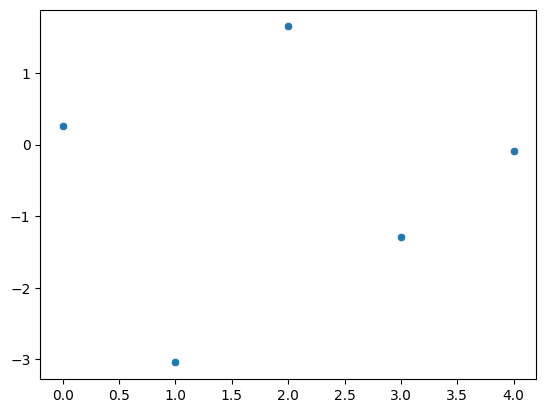

In [41]:
sns.scatterplot(x = list(range(0,len(logreg.coef_[0]))),y = logreg.coef_[0])

### Exercise 4 - Collaborative Statement (5 points)

It is mandatory to include a Statement of Collaboration in each submission, that follows the guidelines below.
Include the names of everyone involved in the discussions (especially in-person ones), and what was discussed.
All students are required to follow the academic honesty guidelines posted on the course website. For
programming assignments in particular, I encourage students to organize (perhaps using Piazza) to discuss the
task descriptions, requirements, possible bugs in the support code, and the relevant technical content before they
start working on it. However, you should not discuss the specific solutions, and as a guiding principle, you are
not allowed to take anything written or drawn away from these discussions (no photographs of the blackboard,
written notes, referring to Piazza, etc.). Especially after you have started working on the assignment, try to restrict
the discussion to Piazza as much as possible, so that there is no doubt as to the extent of your collaboration.

I used the notebook files from Canvas.